<a href="https://colab.research.google.com/github/Benjamin-compute/Emergency-Calls-for-Pennsylvania/blob/main/911_Calls_Analysis_for_the_State_of_Pennsylvania%2C_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project

For this project I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_911 = pd.read_csv('911.csv')

In [ ]:
df_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Data Size:

In [ ]:
n = len(df_911)
df_len = "{:,}".format(n)

print(df_len)

663,522


In [ ]:
# see description or overall info of the data

df_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


# Create new columns for the TimeStamp

* using `lamda apply()` function



In [ ]:
# convert the timestamp from 'str' to 'datetime'
df_911['timeStamp'] = pd.to_datetime(df_911['timeStamp'])

# Create new columns
df_911['Hour'] = df_911['timeStamp'].apply(lambda x: x.hour)
df_911['Day'] = df_911['timeStamp'].apply(lambda x: x.dayofweek)
df_911['Month'] = df_911['timeStamp'].apply(lambda x: x.month)
df_911['Year'] = df_911['timeStamp'].apply(lambda x: x.year)

df_911['Day_name'] = df_911['timeStamp'].apply(lambda x: x.day_name())
df_911['Month_name'] = df_911['timeStamp'].apply(lambda x: x.month_name())

In [ ]:
df_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Day,Month,Year,Day_name,Month_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,3,12,2015,Thursday,December
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,3,12,2015,Thursday,December
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,14,3,12,2015,Thursday,December
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,16,3,12,2015,Thursday,December
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,16,3,12,2015,Thursday,December


# What zipcode(s) had the most 911 calls?

In [ ]:
df_911['zip'].value_counts().nlargest(7)

# df_911.groupby('zip').count()['e'].nlargest(7)

,count
zip,
19401.0,45606
19464.0,43910
19403.0,34888
19446.0,32270
19406.0,22464
19002.0,21070
19468.0,18939


# Township (or local-government) with the most 911 calls

In [ ]:
df_911['twp'].value_counts().nlargest(7)

,count
twp,
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574
POTTSTOWN,27387
UPPER MORELAND,22932


# Reasons for 911 calls

In [ ]:
# Unique titles: count


len(df_911['title'].unique())

148

In [ ]:
# Unique titles

df_911['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

### Here, lets split the title to get a clearer picture of the reason for 911 call

* Using the `lambda apply` function

In [ ]:
# Update the table, so it includes the new split of title (or reason)
# i.e. add two columns extracted from title column -Category and Description

# using lambda function
df_911['Category'] = df_911['title'].apply(lambda x: x.split(':')[0])
df_911['Description'] = df_911['title'].apply(lambda x: x.split(':')[1])

df_911.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Day,Month,Year,Day_name,Month_name,Category,Description
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,17,3,12,2015,Thursday,December,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,3,12,2015,Thursday,December,EMS,DIABETIC EMERGENCY


<Axes: xlabel='Category', ylabel='count'>

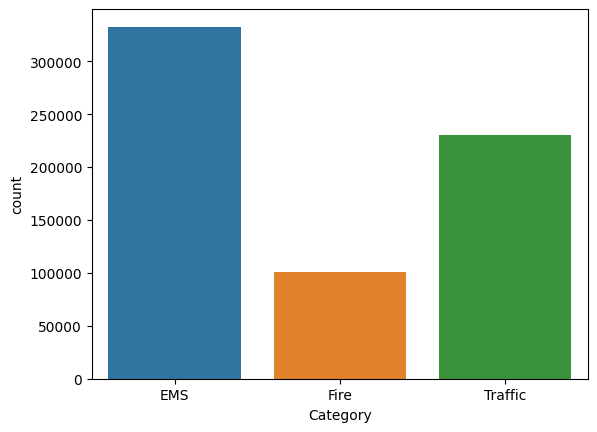

In [ ]:
sns.countplot(x = 'Category',
              data = df_911,
              hue = 'Category')


In [ ]:
# to get the table equivalent
df_911.groupby(['Category', 'Day_name']).count()['e'].sort_values(ascending=False)

Category  Day_name 
EMS       Friday       49368
          Monday       48750
          Tuesday      48371
          Wednesday    48039
          Thursday     47620
          Saturday     46436
          Sunday       44108
Traffic   Friday       38249
          Thursday     36450
          Wednesday    36092
          Tuesday      35002
          Monday       33496
          Saturday     29118
          Sunday       21801
Fire      Friday       15325
          Wednesday    15026
          Thursday     14613
          Monday       14499
          Tuesday      14311
          Saturday     13898
          Sunday       12950
Name: e, dtype: int64

<Axes: xlabel='Day_name', ylabel='count'>

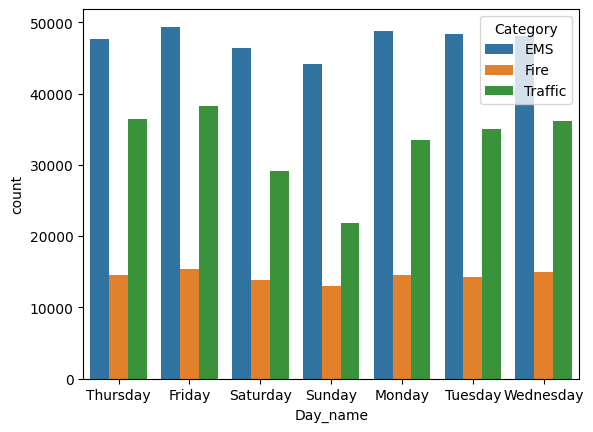

In [ ]:
 # Visually, we have:

 # Daily calls for each category

sns.countplot(x = 'Day_name',
              data = df_911,
              hue = 'Category')

In [ ]:
# to get the table equivalent
df_911.groupby(['Category', 'Month_name']).count()['e'].sort_values(ascending=False)

Category  Month_name
EMS       January       30970
          July          30027
          March         29989
          June          29512
          May           29473
          December      28775
          April         28485
          February      28329
          October       25025
          August        24410
          September     23982
          November      23715
Traffic   January       22279
          March         20903
          December      20865
          June          20643
          July          20140
          May           19345
          November      19117
          February      19006
          October       18532
          April         17054
          August        16351
          September     15973
Fire      June           9879
          July           9665
          March          9135
          January        9087
          May            8691
          April          8132
          February       8092
          December       8052
          October        7683
          August         7598
          November       7350
          September      7258
Name: e, dtype: int64

<Axes: xlabel='Month', ylabel='count'>

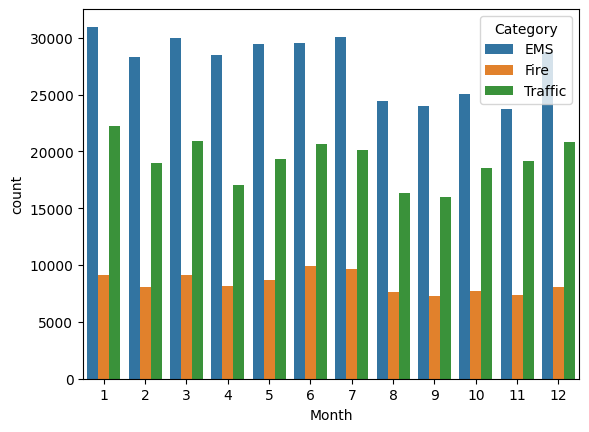

In [ ]:
# Monthly calls for each category

sns.countplot(x = 'Month',
              data = df_911,
              hue = 'Category')

In [ ]:
# to get the table equivalent
df_911.groupby(['Category', 'Year']).count()['e'].sort_index()

Category  Year
EMS       2015     3898
          2016    70127
          2017    71053
          2018    72587
          2019    75006
          2020    40021
Fire      2015     1095
          2016    21577
          2017    20553
          2018    23126
          2019    22272
          2020    11999
Traffic   2015     2923
          2016    50656
          2017    48737
          2018    55814
          2019    51840
          2020    20238
Name: e, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

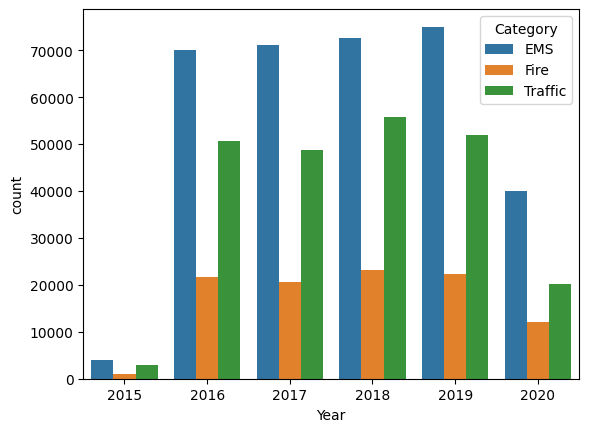

In [ ]:
# Yearly calls for each category

sns.countplot(x = 'Year',
              data = df_911,
              hue = 'Category')

In [ ]:
# Most frequent description

df_911.groupby(['Description', 'Day_name']).count()['e'].sort_values(ascending=False).nlargest(12)

Description         Day_name 
VEHICLE ACCIDENT -  Friday       24848
                    Tuesday      23520
                    Wednesday    23402
                    Thursday     23276
                    Monday       21447
                    Saturday     18508
                    Sunday       13371
DISABLED VEHICLE -  Thursday      7963
                    Friday        7758
                    Wednesday     7230
                    Tuesday       6957
                    Monday        6776
Name: e, dtype: int64

## Insights.
* Most 911 calls in this were Emergency Medical Service (EMS) related issues with Vehicle Accident topping the chat
* Friday was the busiest day for the Cops and Fire men in the county of study  
* January, July and March had relatively, the same amount of EMS-911 calls, Traffic was mostly in January and June for Fire calls (as expected)
* 2018 was the peak of Traffic and Fire 911 calls, and 2019 for EMS. All categories were ~20x more than in 2015



In [ ]:
# check if Vehicle Accident is unique to a particular 'Category'

find_Vehicle_Accident = df_911[df_911['Description'].str.contains('VEHICLE')]

# run a quick check
find_Vehicle_Accident.groupby('Category').count()['e'].sort_values(ascending=False)

,e
Category,
Traffic,199939
EMS,25741
Fire,14440


# What Hour of the Day got the most 911 calls?
* Here we employ a heat map

In [ ]:
# restructure the data: such that Day is the index and Hour is the column

df_911_hour = df_911.groupby(['Day_name', 'Hour']).count()['e'].unstack()
df_911_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_name,,,,,,,,,,,,,,,,,,,,,
Friday,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Monday,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Saturday,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sunday,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thursday,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tuesday,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wednesday,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


<Axes: xlabel='Hour', ylabel='Day_name'>

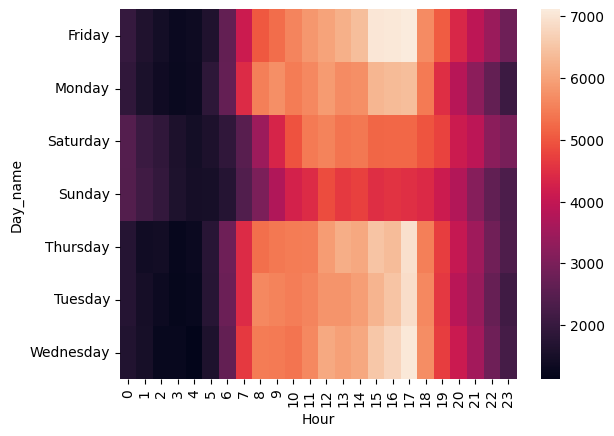

In [ ]:
sns.heatmap(df_911_hour)

## Insights.
* Between 12am and 5am, on weekdays, got the most 911 calls

# What Days of the Month got the most 911 calls?
* Here we employ a heat map

In [ ]:
# restructure the data: such that Day is the index and Month is the column

df_911_month = df_911.groupby(['Day_name', 'Month']).count()['e'].unstack()
df_911_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day_name,,,,,,,,,,,,
Friday,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Monday,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Saturday,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sunday,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thursday,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tuesday,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wednesday,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


<Axes: xlabel='Month', ylabel='Day_name'>

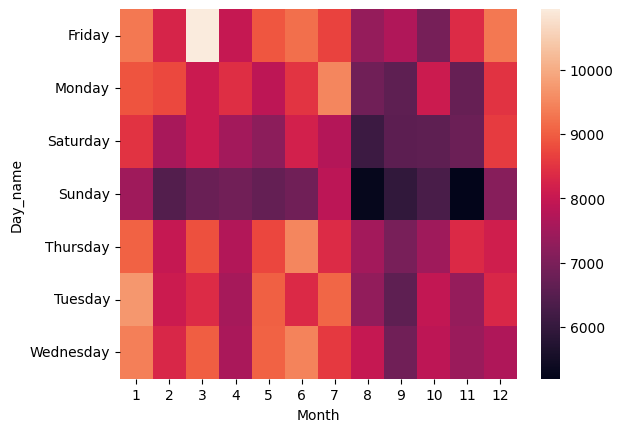

In [ ]:
# visually

sns.heatmap(df_911_month)

## Insights.
* In August and November, the police got the most calls per year, compared to any other day-month
* Fridays in March got the least 911 calls